In [1]:
import numpy as np
import matplotlib.pyplot as plt

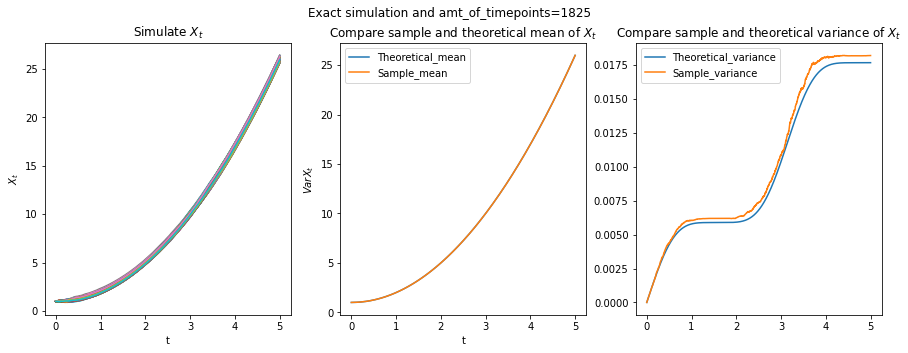

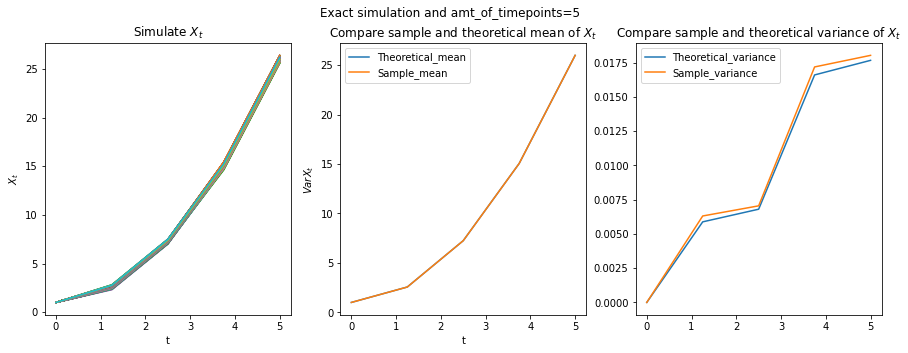

In [19]:
#question 1c: 

def a(u):
    return u**2
def b(u):
    return 0.01*(3/8*u + 1/4*np.sin(2*u) + 1/32*np.sin(4*u))

def get_exact_simulation(x,T,amt_of_timepoints,N):
    mas_t=np.linspace(0,T,amt_of_timepoints)
    mas_samples=np.zeros(N*len(mas_t)).reshape(N,len(mas_t))
    mas_samples[:,0]=x #X0=x
    for k in range(1,len(mas_t)):
        tk=mas_t[k]
        tkm1=mas_t[k-1]
        ak=a(tk)-a(tkm1)
        bk=b(tk)-b(tkm1)
        mas_of_increments=ak + np.sqrt(bk)*np.random.normal(loc=0,scale=1,size=N)
        mas_samples[:,k]=mas_samples[:,k-1]+mas_of_increments.flatten()

    theor_mean=x+np.array([a(tk) for tk in mas_t])
    sample_mean=mas_samples.mean(axis=0)
    theor_variance=[b(tk) for tk in mas_t]
    sample_variance=mas_samples.var(axis=0)

    fig, axes = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for n in range(N):
        axes[0].plot(mas_t, mas_samples[n,:])

    axes[1].plot(mas_t,theor_mean,label='Theoretical_mean')
    axes[1].plot(mas_t,sample_mean,label='Sample_mean')

    axes[2].plot(mas_t,theor_variance,label='Theoretical_variance')
    axes[2].plot(mas_t,sample_variance,label='Sample_variance')

    axes[0].set_xlabel('t')
    axes[1].set_xlabel('t')
    axes[1].set_xlabel('t')

    axes[0].set_ylabel('$X_t$')
    axes[1].set_ylabel('$EX_t$')
    axes[1].set_ylabel('$VarX_t$')

    axes[1].legend()
    axes[2].legend()

    axes[0].set_title("Simulate $X_t$")
    axes[1].set_title("Compare sample and theoretical mean of $X_t$")
    axes[2].set_title("Compare sample and theoretical variance of $X_t$")
    fig.suptitle('Exact simulation and amt_of_timepoints={}'.format(amt_of_timepoints))
    plt.show()
    
get_exact_simulation(x=1, T=5, amt_of_timepoints=5*365, N=1000)
get_exact_simulation(x=1, T=5, amt_of_timepoints=5, N=1000)

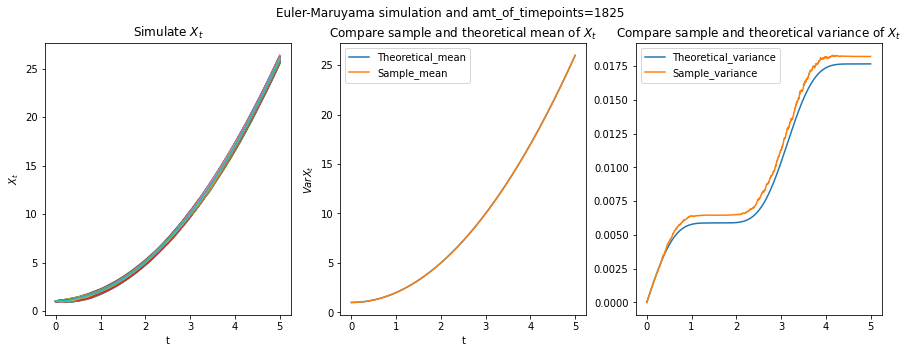

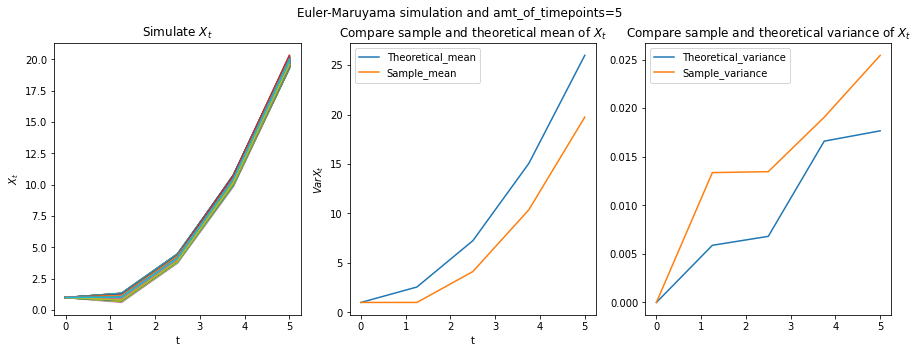

In [22]:
#question 1d
def mu(u):
    return 2*u
def sigma(u):
    return 0.1*np.cos(u)**2
def a(u):
    return u**2
def b(u):
    return 0.01*(3/8*u + 1/4*np.sin(2*u) + 1/32*np.sin(4*u))

def get_euler_maruyama_simulation(x,T,amt_of_timepoints,N):    
    mas_t=np.linspace(0,T,amt_of_timepoints)
    mas_samples=np.zeros(N*len(mas_t)).reshape(N,len(mas_t))
    mas_samples[:,0]=x #X0=x
    for k in range(1,len(mas_t)):
        tk=mas_t[k]
        tkm1=mas_t[k-1]
        mas_of_increments=mu(tkm1)*(tk-tkm1) + sigma(tkm1)*np.sqrt(tk-tkm1)*np.random.normal(loc=0,scale=1,size=N)
        mas_samples[:,k]=mas_samples[:,k-1]+mas_of_increments.flatten()

    theor_mean=x+np.array([a(tk) for tk in mas_t])
    sample_mean=mas_samples.mean(axis=0)
    theor_variance=[b(tk) for tk in mas_t]
    sample_variance=mas_samples.var(axis=0)

    fig, axes = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for n in range(N):
        axes[0].plot(mas_t, mas_samples[n,:])

    axes[1].plot(mas_t,theor_mean,label='Theoretical_mean')
    axes[1].plot(mas_t,sample_mean,label='Sample_mean')

    axes[2].plot(mas_t,theor_variance,label='Theoretical_variance')
    axes[2].plot(mas_t,sample_variance,label='Sample_variance')

    axes[0].set_xlabel('t')
    axes[1].set_xlabel('t')
    axes[1].set_xlabel('t')

    axes[0].set_ylabel('$X_t$')
    axes[1].set_ylabel('$EX_t$')
    axes[1].set_ylabel('$VarX_t$')

    axes[1].legend()
    axes[2].legend()

    axes[0].set_title("Simulate $X_t$")
    axes[1].set_title("Compare sample and theoretical mean of $X_t$")
    axes[2].set_title("Compare sample and theoretical variance of $X_t$")
    fig.suptitle('Euler-Maruyama simulation and amt_of_timepoints={}'.format(amt_of_timepoints))
    plt.show()

get_euler_maruyama_simulation(x=1, T=5, amt_of_timepoints=5*365, N=1000)  
get_euler_maruyama_simulation(x=1, T=5, amt_of_timepoints=5, N=1000)  

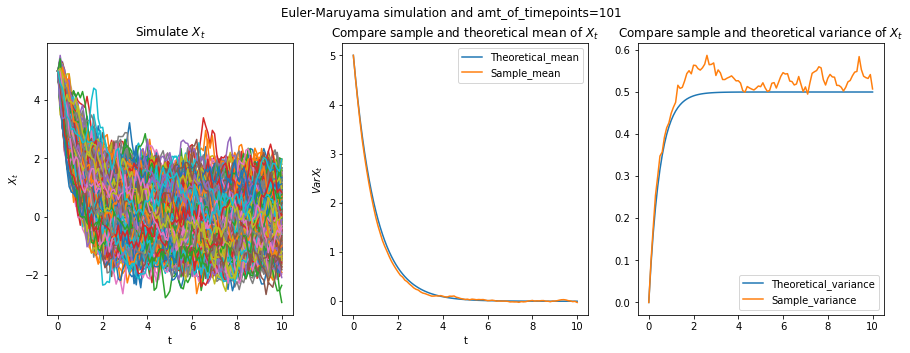

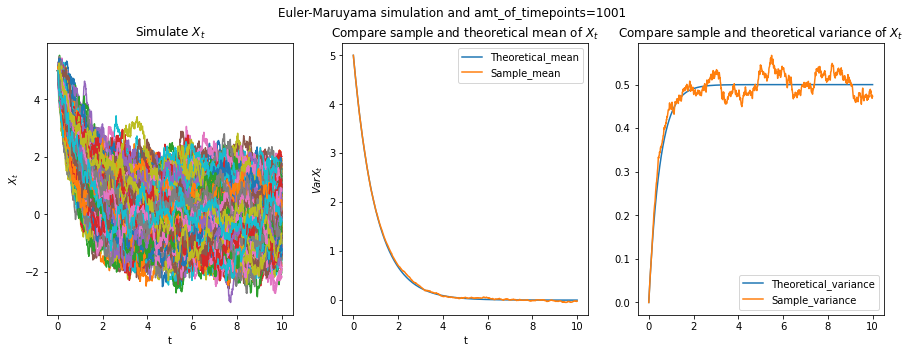

In [42]:
#question 2c: 

def mu(t,x,alpha,sigm):
    return -alpha*x
def sigma(t,x,alpha,sigm):
    return sigm
def a(t,x,alpha,sigm):
    return x*np.exp(-alpha*t)
def b(t,x,alpha,sigm):
    return 0.5*sigm**2/alpha*(1-np.exp(-2*alpha*t))


def get_euler_maruyama_simulation_ornstein(x,alpha,sigm,T,amt_of_timepoints,N):    
    mas_t=np.linspace(0,T,amt_of_timepoints)
    mas_samples=np.zeros(N*len(mas_t)).reshape(N,len(mas_t))
    mas_samples[:,0]=x #X0=x
    #print(mas_t)
    for k in range(1,len(mas_t)):
        tk=mas_t[k]
        tkm1=mas_t[k-1]
        Xkm1=mas_samples[:,k-1].flatten()
        mas_of_increments=mu(tkm1,Xkm1,alpha,sigm)*(tk-tkm1) + sigma(tkm1,Xkm1,alpha,sigm)*np.sqrt(tk-tkm1)*np.random.normal(loc=0,scale=1,size=N)
        #print(mas_of_increments)
        mas_samples[:,k]=mas_samples[:,k-1]+mas_of_increments.flatten()
        #print(mas_samples)

    theor_mean=np.array([a(tk,x,alpha,sigm) for tk in mas_t])
    sample_mean=mas_samples.mean(axis=0)
    theor_variance=[b(tk,x,alpha,sigm) for tk in mas_t]
    sample_variance=mas_samples.var(axis=0)

    fig, axes = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for n in range(N):
        axes[0].plot(mas_t, mas_samples[n,:])

    axes[1].plot(mas_t,theor_mean,label='Theoretical_mean')
    axes[1].plot(mas_t,sample_mean,label='Sample_mean')

    axes[2].plot(mas_t,theor_variance,label='Theoretical_variance')
    axes[2].plot(mas_t,sample_variance,label='Sample_variance')

    axes[0].set_xlabel('t')
    axes[1].set_xlabel('t')
    axes[1].set_xlabel('t')

    axes[0].set_ylabel('$X_t$')
    axes[1].set_ylabel('$EX_t$')
    axes[1].set_ylabel('$VarX_t$')

    axes[1].legend()
    axes[2].legend()

    axes[0].set_title("Simulate $X_t$")
    axes[1].set_title("Compare sample and theoretical mean of $X_t$")
    axes[2].set_title("Compare sample and theoretical variance of $X_t$")
    fig.suptitle('Euler-Maruyama simulation and amt_of_timepoints={}'.format(amt_of_timepoints))
    plt.show()

get_euler_maruyama_simulation_ornstein(x=5, alpha=1, sigm=1, T=10, amt_of_timepoints=int(10/0.1)+1, N=1000)  
get_euler_maruyama_simulation_ornstein(x=5, alpha=1, sigm=1, T=10, amt_of_timepoints=int(10/0.01)+1, N=1000)  